In [70]:
import numpy as np
import pandas as pd
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt

data_path='./Images/'
x_df = pd.read_csv('./data/val_image_paths_rev.txt', header=None).squeeze().to_numpy()
t_df = torch.load('./data/val_y.pt')

In [71]:
x_df

array(['windshield/windshield_08s.jpg', 'mango/mango_13s.jpg',
       'brownie/brownie_08s.jpg', ..., 'steamroller/steamroller_07n.jpg',
       'coffee_filter/coffee_filter_07s.jpg',
       'microscope/microscope_14n.jpg'], dtype=object)

In [72]:
t_df

tensor([1820,  966,  204,  ..., 1545,  379,  999])

In [73]:
img=np.array(Image.open(os.path.join(data_path,x_df[150])).resize((32,32)))

In [74]:
img.shape

(32, 32, 3)

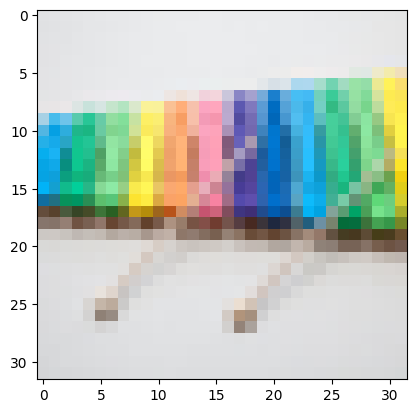

In [75]:
plt.imshow(img)

In [76]:
data_path='./Images/'
train_x_df=pd.read_csv('./data/train_image_paths_rev.txt', header=None)
train_y_df=pd.DataFrame(torch.load('./data/train_y.pt'))
train_df=pd.concat([train_x_df, train_y_df], axis=1)
train_df.columns=['fpath', 'y']
train_df.fpath=train_df.fpath.map(lambda x: data_path+x)
train_df

,fpath,y
0,./Images/vest/vest_10s.jpg,1759
1,./Images/fencepost/fencepost_10s.jpg,576
2,./Images/fondue/fondue_10s.jpg,626
3,./Images/camel/camel_10s.jpg,245
4,./Images/stingray/stingray_10s.jpg,1556
...,...,...
65723,./Images/hole/hole_08s.jpg,785
65724,./Images/candelabra/candelabra_14s.jpg,252
65725,./Images/skin/skin_08s.jpg,1456
65726,./Images/manhole/manhole_17n.jpg,967


In [77]:
class train_dataset(torch.utils.data.Dataset):
    def __init__(self, df, outsize, transform=None):
        self.train_df=df
        self.fpath_list = df["fpath"].to_list()
        self.y_list=df["y"].to_list()
        self.outsize = outsize
        self.len = len(self.fpath_list)
        self.transform = transform

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        image_path = self.fpath_list[idx]
        
        # 画像の読込
        image = Image.open(image_path)
        image = image.resize(self.outsize)
        image = np.array(image)

        if self.transform:
            transformed = self.transform(image=image)
            image = transformed['image']
        else:
            image = np.array(image).astype(np.uint8).transpose(2, 1, 0)

        y = self.y_list[idx]

        path = self.fpath_list[idx]

        return image, y

In [78]:
train_data = train_dataset(train_df[:12], (32, 32), )

(3, 32, 32) <class 'numpy.ndarray'> 1759 12


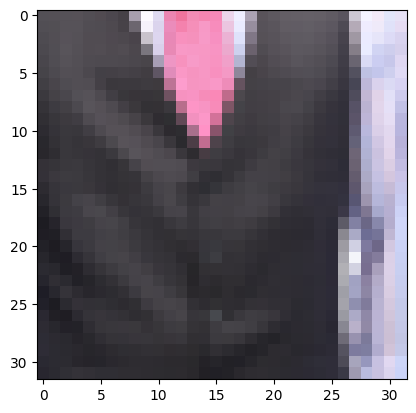

In [79]:
X,y=train_data[0]
print(X.shape, type(X), y, len(train_data))
plt.imshow(X.transpose(2, 1, 0).astype(np.uint8))

In [80]:
batch_size=4
dataloader_train = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=True,
    #persistent_workers=True
)

In [81]:
Iter=iter(dataloader_train)
batch1, y1=next(Iter)
print(batch1.shape, type(batch1))

torch.Size([4, 3, 32, 32]) <class 'torch.Tensor'>


In [82]:
#先頭から3つのバッチを確認
cnt = 0
for data in dataloader_train:
    print(data[0].shape, type(data[0]))
    print(data[1].shape, type(data[1]))
    print("=========")
    cnt += 1
    if cnt==3:
        break

torch.Size([4, 3, 32, 32]) <class 'torch.Tensor'>
torch.Size([4]) <class 'torch.Tensor'>
torch.Size([4, 3, 32, 32]) <class 'torch.Tensor'>
torch.Size([4]) <class 'torch.Tensor'>
torch.Size([4, 3, 32, 32]) <class 'torch.Tensor'>
torch.Size([4]) <class 'torch.Tensor'>


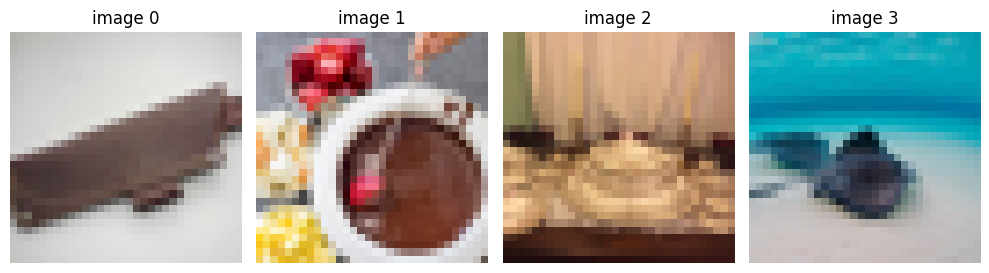

In [83]:
# 画像を出力
plt.figure(figsize = (10, 10))

for i in range(batch1.shape[0]):
    plt.subplot(batch1.shape[0]//4+1, 4, i+1)
    plt.title(f"image {i}")
    plt.axis("off")
    plt.imshow(batch1[i, :, :, :].numpy().transpose(2, 1, 0))

plt.tight_layout()

In [84]:
a=torch.randn((271,281))
b=torch.zeros((271,1))
c=torch.zeros((11,282))
d=torch.cat((a,b), dim=1)
e=torch.cat((d,c), dim=0)
e.shape

torch.Size([282, 282])